-----------------------------
# **Gráfico de Cotizaciones Internacionales relacionadas con el Precio del GLP Envasado Regulado**
----------------


Informe de: Cotizaciones Internacionales relacionadas con el Precio del GLP Envasado Regulado Informe de: Cotizaciones Internacionales relacionadas con el Precio del GLP Envasado Regulado

## Importamos librerías 

In [105]:
import pandas as pd 
import numpy as np
import json
import pprint
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from collections import Counter

from statsmodels.tsa.seasonal import seasonal_decompose


## Lectura del archivo JSON

In [106]:
glp = pd.read_json('Cotizaciones_Internacionales_Precio_GLP_Envasado_Regulado.json', encoding='utf-8-sig')

## EDA (EXPLORATORY DATA ANALYST)

In [107]:
glp

,fecha,promedio_butano_80_propano_20_,flete,brent_dated
0,2024-05,0.4481,0.0228,0.5525
1,2024-04,0.5128,0.0186,0.6110
2,2024-03,0.5241,0.0195,0.5731
3,2024-02,0.4982,0.0163,0.5663
4,2024-01,0.4833,0.0218,0.5356
...,...,...,...,...
324,1997-05,0.1535,0.0294,0.1202
325,1997-04,0.1710,0.0278,0.1102
326,1997-03,0.2061,0.0272,0.1199
327,1997-02,0.2439,0.0319,0.1292


In [108]:
glp.info()

print('\nEl datframe NO tiene nulos')
print('-----------------------------------------------------------')

print(f'La shape del dataframe: ', glp.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   fecha                           329 non-null    object 
 1   promedio_butano_80_propano_20_  329 non-null    float64
 2   flete                           329 non-null    float64
 3   brent_dated                     329 non-null    float64
dtypes: float64(3), object(1)
memory usage: 10.4+ KB

El datframe NO tiene nulos
-----------------------------------------------------------
La shape del dataframe:  (329, 4)


In [109]:
glp.describe()

,promedio_butano_80_propano_20_,flete,brent_dated
count,329.000000,329.000000,329.000000
mean,0.395714,0.033274,0.366598
std,0.168642,0.016525,0.171635
min,0.092600,0.010300,0.061400
25%,0.263500,0.021500,0.214500
50%,0.374800,0.029800,0.367300
75%,0.516800,0.040600,0.502300
max,0.842400,0.106400,0.852200


In [110]:
len(glp)

329

In [111]:
glp.columns

Index(['fecha', 'promedio_butano_80_propano_20_', 'flete', 'brent_dated'], dtype='object')

In [112]:
glp.dtypes

fecha                              object
promedio_butano_80_propano_20_    float64
flete                             float64
brent_dated                       float64
dtype: object

In [113]:
num_filas, num_columnas = glp.shape

print(f'Número de filas: {num_filas}.')
print(f'Número de columnas: {num_columnas}.')

Número de filas: 329.
Número de columnas: 4.


In [114]:
faltantes = glp.isna().sum() + (glp == '').sum()
faltantes
#No hay datos faltantes

fecha                             0
promedio_butano_80_propano_20_    0
flete                             0
brent_dated                       0
dtype: int64

In [115]:
duplicados = glp.duplicated()
duplicados

0      False
1      False
2      False
3      False
4      False
       ...  
324    False
325    False
326    False
327    False
328    False
Length: 329, dtype: bool

In [116]:
filas_duplicadas = glp[glp.duplicated()]
filas_duplicadas

,fecha,promedio_butano_80_propano_20_,flete,brent_dated


## Análisis de la Serie Temporal con seaborn y plotly express

In [117]:
# Convertir la columna de fechas a tipo datetime
glp['fecha'] = pd.to_datetime(glp['fecha'])

###  Gráfico de línea temporal con Seaborn

<Axes: xlabel='fecha', ylabel='promedio_butano_80_propano_20_'>

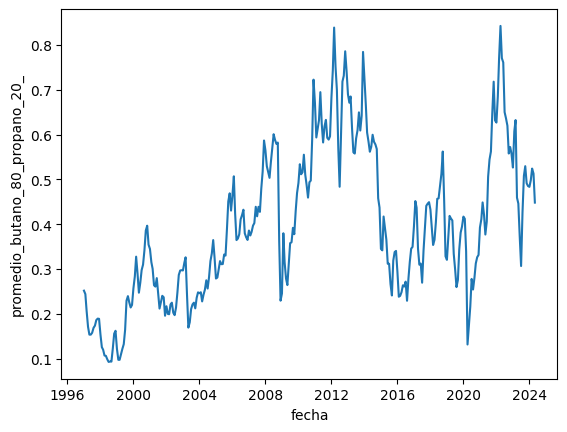

In [118]:
sns.lineplot(data=glp, x='fecha', y='promedio_butano_80_propano_20_')

<Axes: xlabel='fecha', ylabel='flete'>

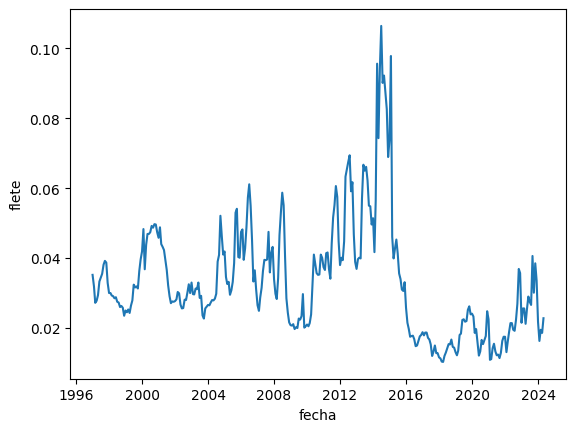

In [119]:
sns.lineplot(data=glp, x='fecha', y='flete')

<Axes: xlabel='fecha', ylabel='brent_dated'>

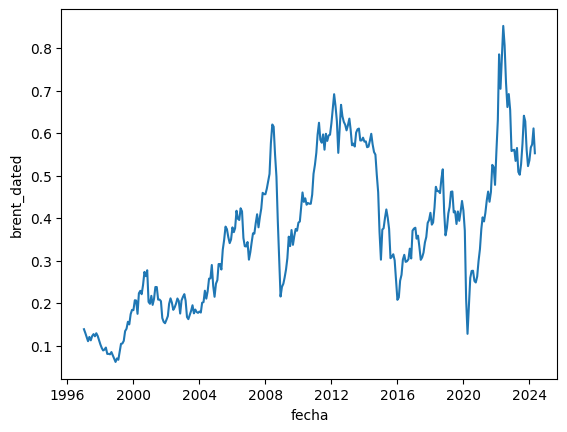

In [120]:
sns.lineplot(data=glp, x='fecha', y='brent_dated')

### Tendencias Temporales con Ploty express


In [121]:
fig = px.line(glp, x='fecha', y='promedio_butano_80_propano_20_', title='Promedio Butano 80% Propano 20% a lo largo del tiempo')
fig.show()

In [122]:
fig = px.line(glp, x='fecha', y='flete', title='Flete a lo largo del tiempo')
fig.show()

In [123]:
fig = px.line(glp, x='fecha', y='brent_dated', title='Brent Dated a lo largo del tiempo')
fig.show()

## Correlaciones entre Variables

###  Mapa de calor de correlación con Seaborn

<Axes: >

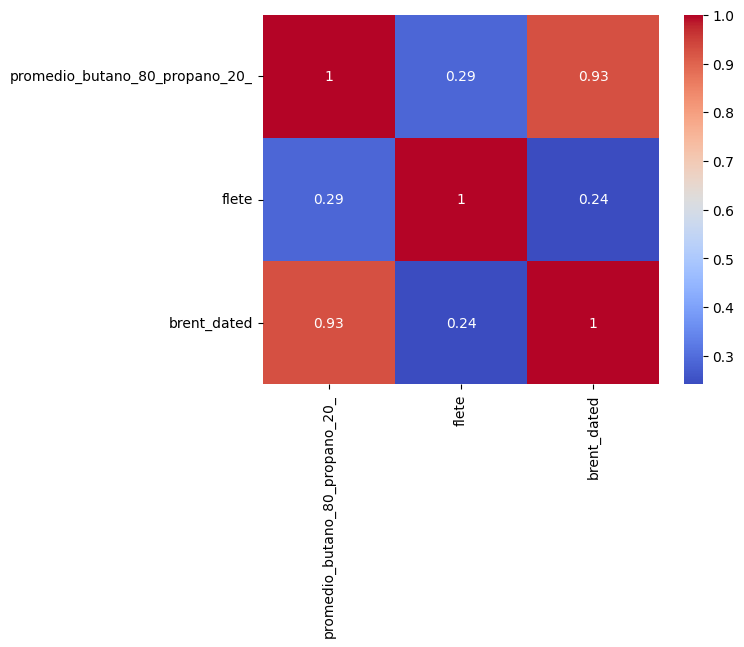

In [124]:

correlation_matrix = glp[['promedio_butano_80_propano_20_', 'flete', 'brent_dated']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

### # Mapa de calor de correlación con Plotly Express

In [125]:

fig = px.imshow(correlation_matrix, text_auto=True, aspect="auto", title='Matriz de Correlación')
fig.show()

### Gráfico de dispersión con Seaborn

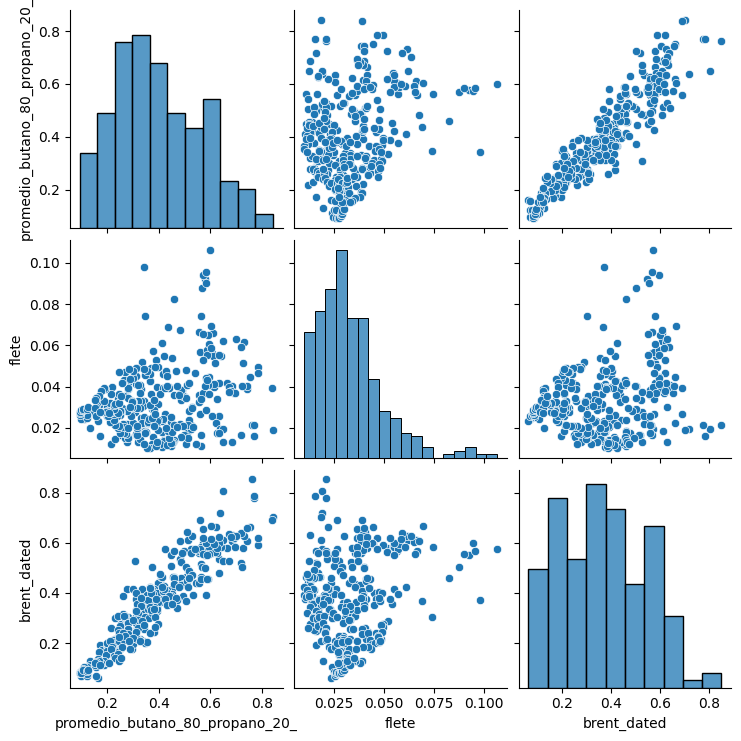

In [126]:
sns.pairplot(glp[['promedio_butano_80_propano_20_', 'flete', 'brent_dated']])

### # Gráfico de dispersión con Plotly Express

In [127]:
fig = px.scatter_matrix(glp, dimensions=['promedio_butano_80_propano_20_', 'flete', 'brent_dated'], title='Matriz de Dispersión')
fig.show()

## Análisis de Distribución

###  Histogramas con Seaborn

<Axes: xlabel='promedio_butano_80_propano_20_', ylabel='Count'>

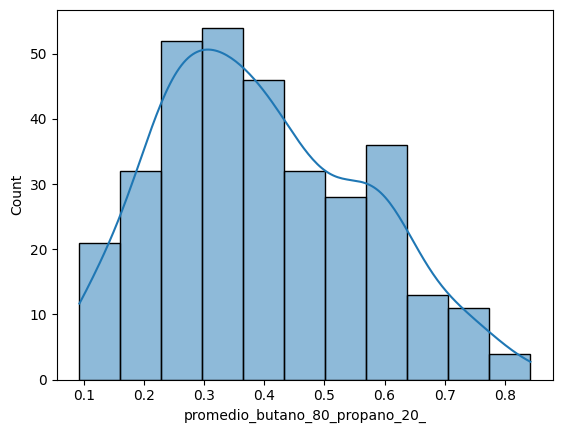

In [128]:
sns.histplot(glp['promedio_butano_80_propano_20_'], kde=True)

<Axes: xlabel='flete', ylabel='Count'>

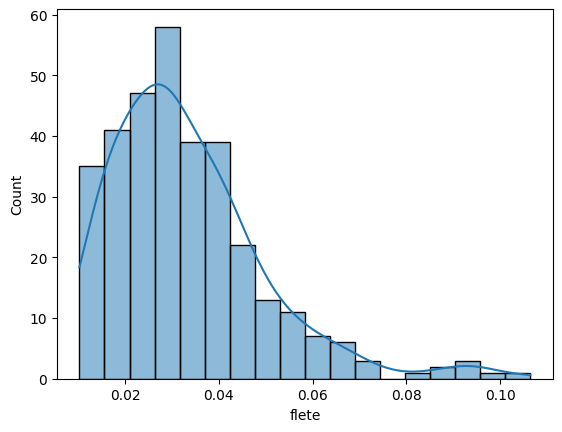

In [129]:
sns.histplot(glp['flete'], kde=True)


<Axes: xlabel='brent_dated', ylabel='Count'>

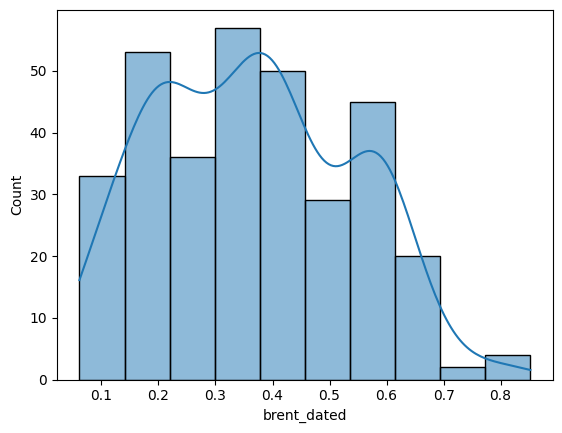

In [130]:
sns.histplot(glp['brent_dated'], kde=True)

### Histogramas con Plotly Express

In [131]:

fig = px.histogram(glp, x='promedio_butano_80_propano_20_', nbins=30, title='Distribución del Promedio Butano 80% Propano 20%')
fig.show()

In [132]:
fig = px.histogram(glp, x='flete', nbins=30, title='Distribución del Flete')
fig.show()

In [133]:
fig = px.histogram(glp, x='brent_dated', nbins=30, title='Distribución del Brent Dated')
fig.show()

##  Analizar las tendencias temporales y detectar estacionalidad o patrones cíclicos

In [134]:
# Paso a índice la fecha 
glp.set_index('fecha', inplace=True)

In [135]:
glp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 329 entries, 2024-05-01 to 1997-01-01
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   promedio_butano_80_propano_20_  329 non-null    float64
 1   flete                           329 non-null    float64
 2   brent_dated                     329 non-null    float64
dtypes: float64(3)
memory usage: 10.3 KB


In [136]:
fig = px.line(glp, x=glp.index, y=['promedio_butano_80_propano_20_', 'flete', 'brent_dated'], title='Tendencias a lo largo del tiempo')
fig.update_layout(xaxis_title='Fecha', yaxis_title='Valores', legend_title='Variables')
fig.show()

In [137]:
# Descomposición de cada serie temporal
result_butano_propano = seasonal_decompose(glp['promedio_butano_80_propano_20_'], model='additive', period=12)
result_flete = seasonal_decompose(glp['flete'], model='additive', period=12)
result_brent_dated = seasonal_decompose(glp['brent_dated'], model='additive', period=12)

In [138]:
# Grafica los resultados de la descomposición
def plot_decomposition(result, variable_name):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10))
    fig.suptitle(f'Descomposición de {variable_name}', fontsize=16)
    
    result.observed.plot(ax=ax1)
    ax1.set_ylabel('Observado')
    
    result.trend.plot(ax=ax2)
    ax2.set_ylabel('Tendencia')
    
    result.seasonal.plot(ax=ax3)
    ax3.set_ylabel('Estacionalidad')
    
    result.resid.plot(ax=ax4)
    ax4.set_ylabel('Residuo')
    
    plt.show()

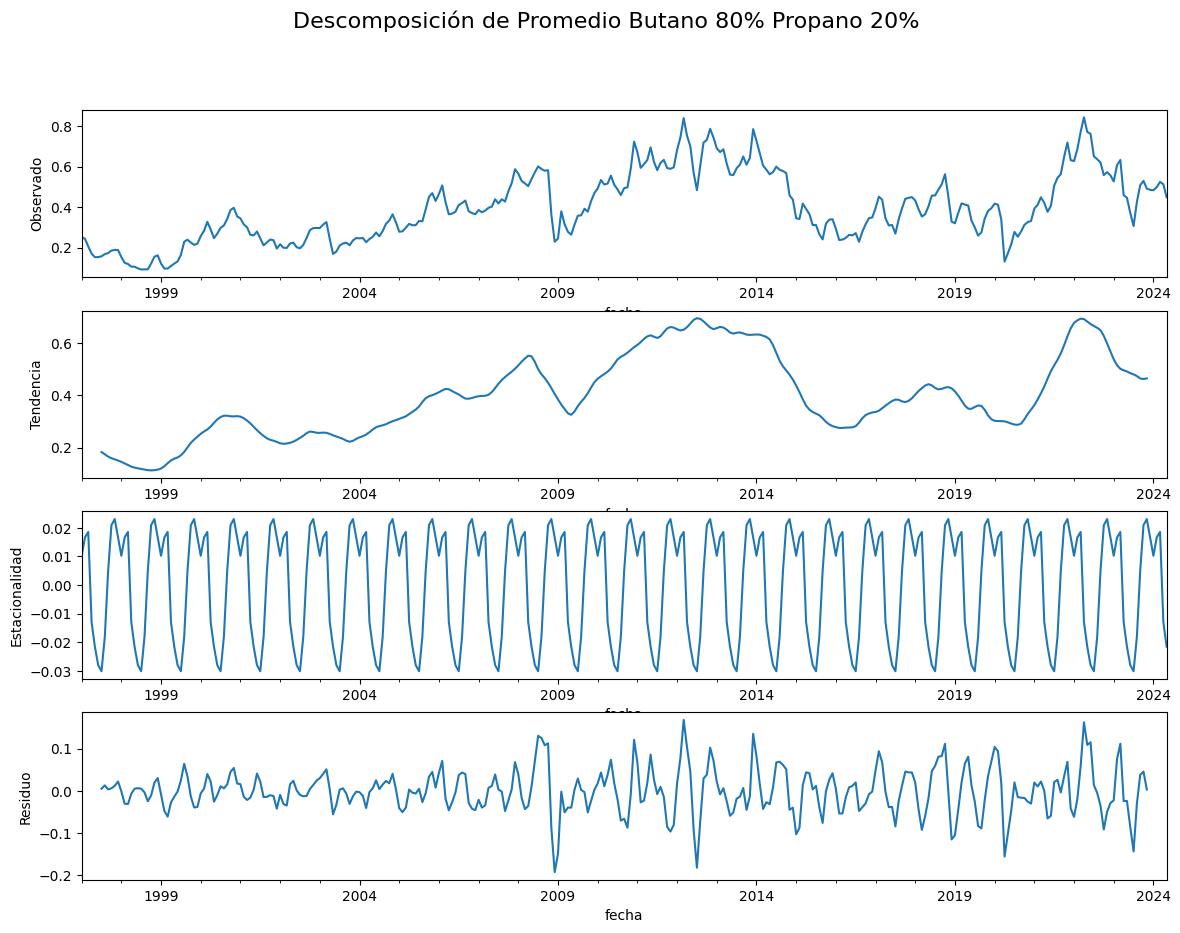

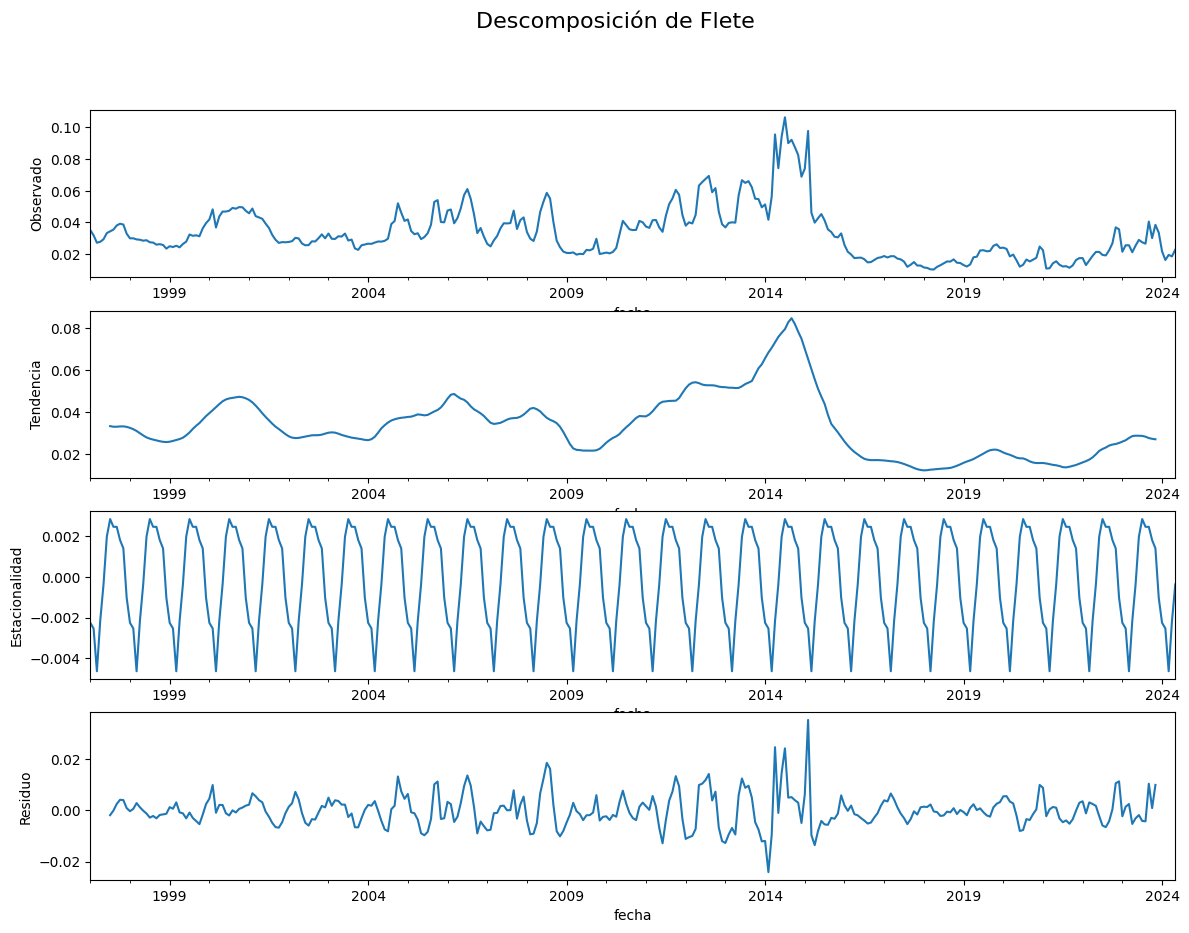

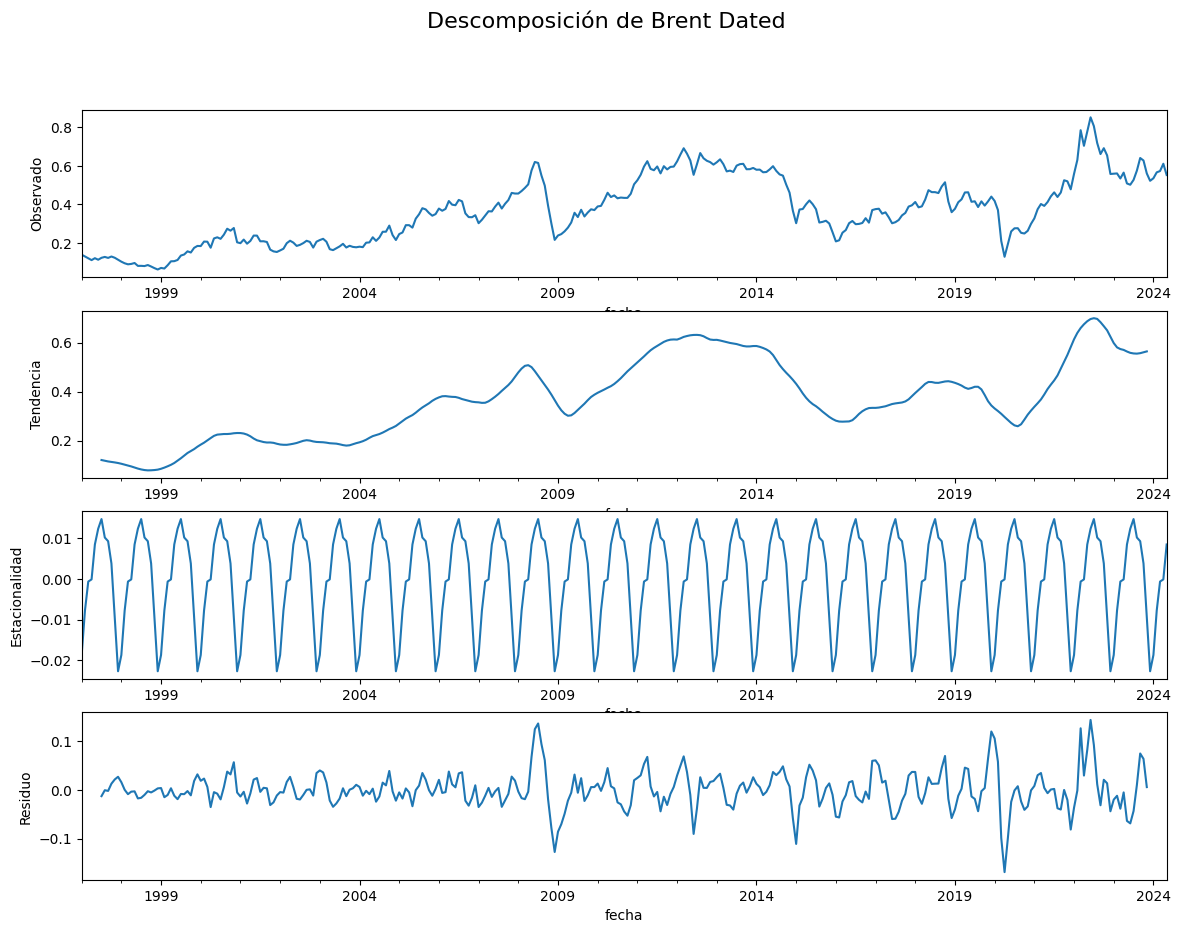

In [139]:
# Grafica de la  descomposición para cada variable
plot_decomposition(result_butano_propano, 'Promedio Butano 80% Propano 20%')
plot_decomposition(result_flete, 'Flete')
plot_decomposition(result_brent_dated, 'Brent Dated')